In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
# Load the dataset (replace this URL with the one given in your notebook)
url = "Airbnb_data.csv"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [190]:
# Inspect the dataset
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  la

In [191]:
# Check missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [192]:
# Fill missing values in 'reviews_per_month' with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Drop 'last_review' column
if 'last_review' in df.columns:
    df = df.drop(columns=['last_review'])

# Replace missing values in 'name' and 'host_name' with 'unknown'
df['name'] = df['name'].fillna("unknown")
df['host_name'] = df['host_name'].fillna("unknown")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [193]:
# Convert columns to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df=df[df['price']>0]
df=df.dropna(subset=['neighbourhood_group','room_type','availability_365','price'])

In [194]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [195]:
# Drop rows where price is zero or negative
df = df[df['price'] > 0]

# Remove rows where minimum_nights is >= 365
df = df[df['minimum_nights'] < 365]

In [196]:
print(df.shape)
df[['price','minimum_nights']].head()

(48841, 15)


,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10


In [199]:
import numpy as np

# Calculate Q1 and Q3
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['number_of_reviews'] = np.where(
    df['number_of_reviews'] < lower_bound,
    lower_bound,
    np.where(df['number_of_reviews'] > upper_bound, upper_bound, df['number_of_reviews'])
)

In [206]:
print("Lower Bound:",lower_bound)
print("Upper Bound:",upper_bound)
print(df['number_of_reviews'].describe())

Lower Bound: -33.5
Upper Bound: 58.5
count    48841.000000
mean        15.681088
std         20.353239
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max         58.500000
Name: number_of_reviews, dtype: float64


In [209]:
df['number_of_reviews'].head(10)

0     9.0
1    45.0
2     0.0
3    58.5
4     9.0
5    58.5
6    49.0
7    58.5
8    58.5
9    58.5
Name: number_of_reviews, dtype: float64

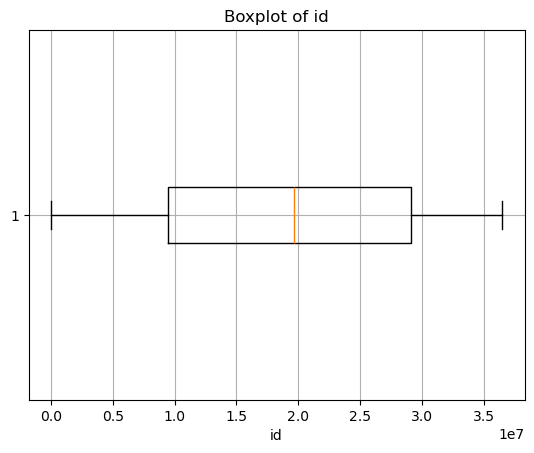

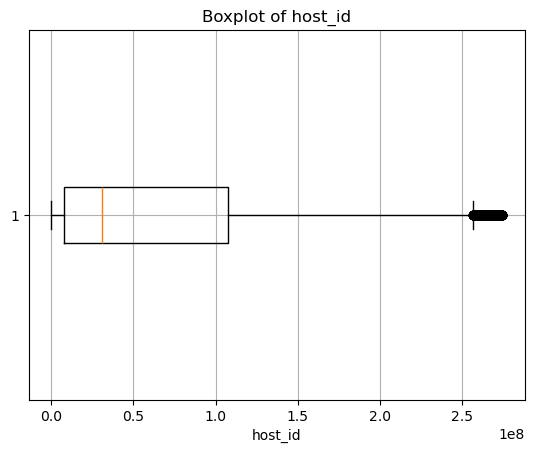

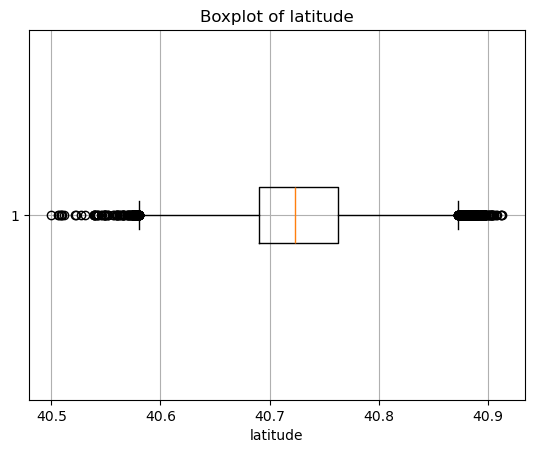

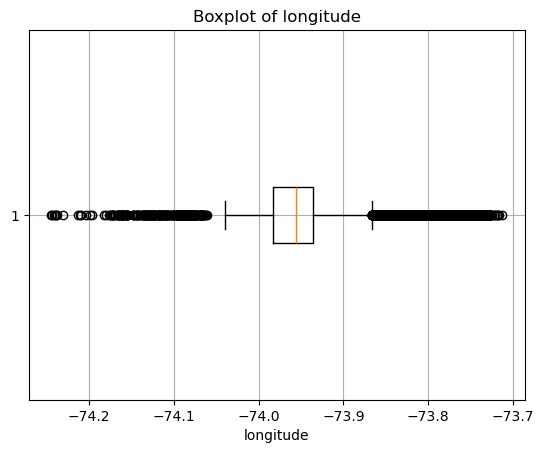

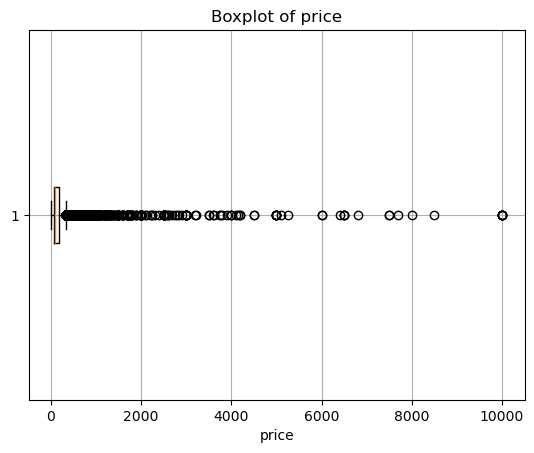

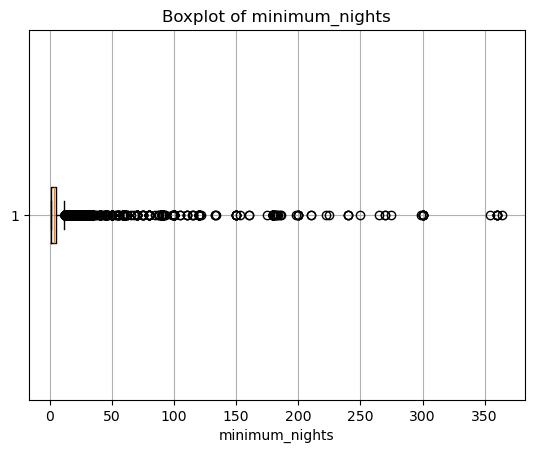

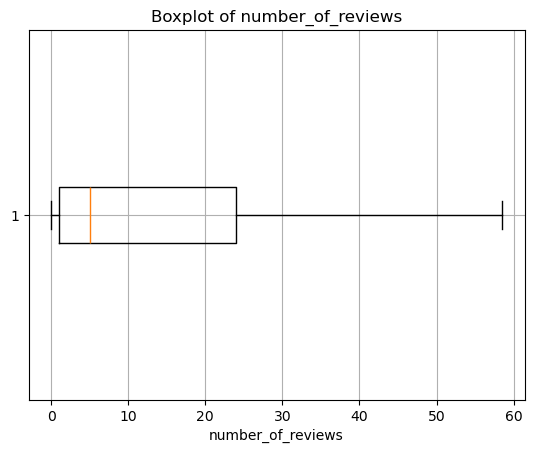

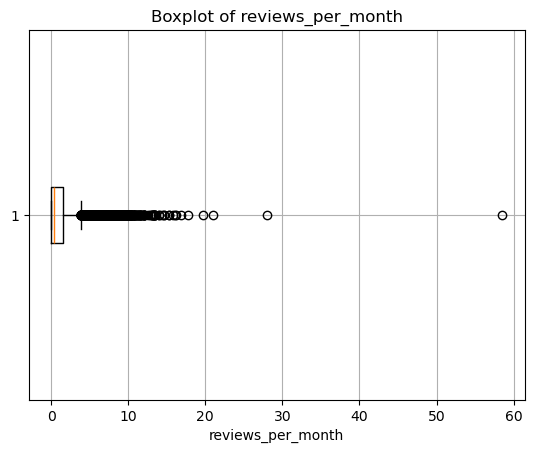

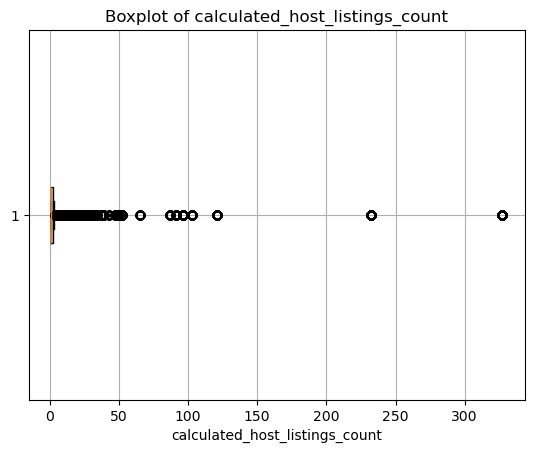

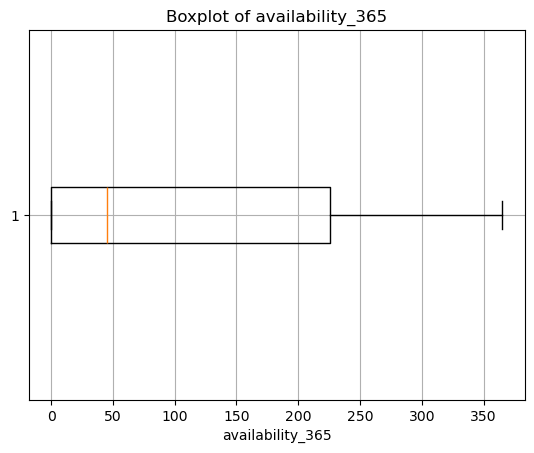

In [211]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

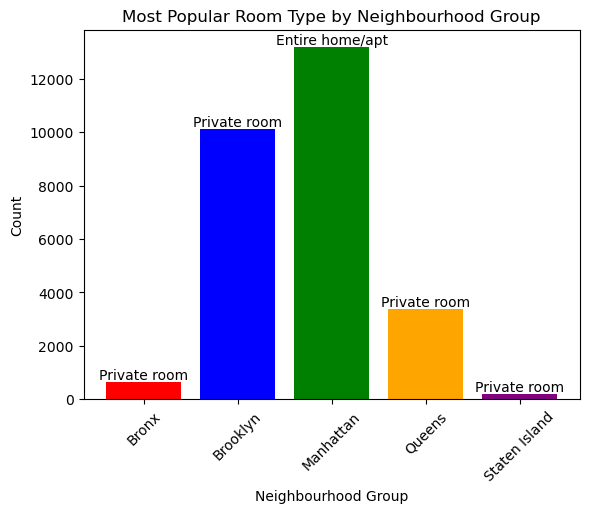

In [212]:
import matplotlib.pyplot as plt

# Create color list
colors = ['red', 'blue', 'green', 'orange', 'purple', 'teal', 'gold']

plt.figure()
plt.bar(
    most_popular['neighbourhood_group'],
    most_popular['count'],
    color=colors[:len(most_popular)]
)

plt.title("Most Popular Room Type by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add room type labels on bars
for i, txt in enumerate(most_popular['room_type']):
    plt.text(i, most_popular['count'].iloc[i], txt, ha='center', va='bottom')

plt.show()

In [213]:
# Create price ranges
bins = [0, 50, 100, 200, 300, 500, 10000]
labels = ['0-50', '51-100', '101-200', '201-300', '301-500', '500+']

df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

In [214]:
price_pref = df.groupby(['neighbourhood_group', 'price_range'],observed=True).size().unstack(fill_value=0)
price_pref

price_range,0-50,51-100,101-200,201-300,301-500,500+
neighbourhood_group,,,,,,
Bronx,370,493,181,21,17,7
Brooklyn,3569,8186,6274,1287,535,228
Manhattan,1035,5878,8794,3482,1677,773
Queens,1468,2633,1241,215,78,27
Staten Island,104,165,78,17,2,6


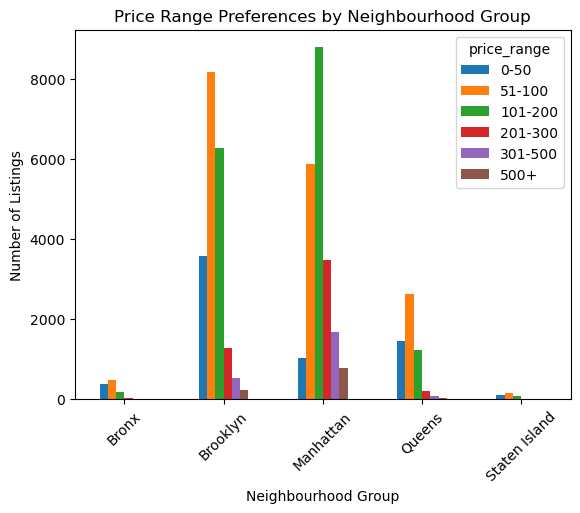

In [215]:
#price range preferance
price_pref.plot(kind='bar')
plt.title("Price Range Preferences by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

In [217]:
# Sum number_of_reviews per neighbourhood
reviews_by_location = df.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False)

reviews_by_location

neighbourhood
Bedford-Stuyvesant            70422.0
Williamsburg                  56302.0
Harlem                        49756.5
Bushwick                      35879.5
Hell's Kitchen                31276.0
                               ...   
Breezy Point                      5.0
Bay Terrace, Staten Island        3.0
New Dorp                          0.0
Woodrow                           0.0
Fort Wadsworth                    0.0
Name: number_of_reviews, Length: 221, dtype: float64

In [221]:
top_location = reviews_by_location.idxmax()
top_count = reviews_by_location.max()

print(f"Location with the most reviews: {top_location} ({top_count} reviews)")

Location with the most reviews: Bedford-Stuyvesant (70422.0 reviews)


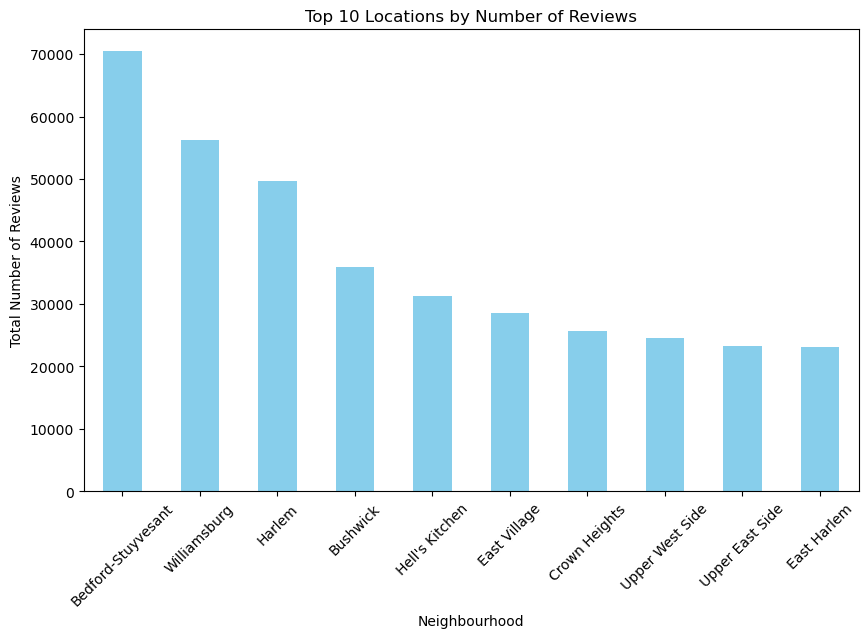

In [223]:
import matplotlib.pyplot as plt

# Top 10 locations by reviews
top10 = reviews_by_location.head(10)

plt.figure(figsize=(10,6))
top10.plot(kind='bar', color='skyblue')
plt.title("Top 10 Locations by Number of Reviews")
plt.xlabel("Neighbourhood")
plt.ylabel("Total Number of Reviews")
plt.xticks(rotation=45)
plt.show()

C:\Users\rssan\AppData\Local\Temp\ipykernel_4656\984191018.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=df, ci=None)


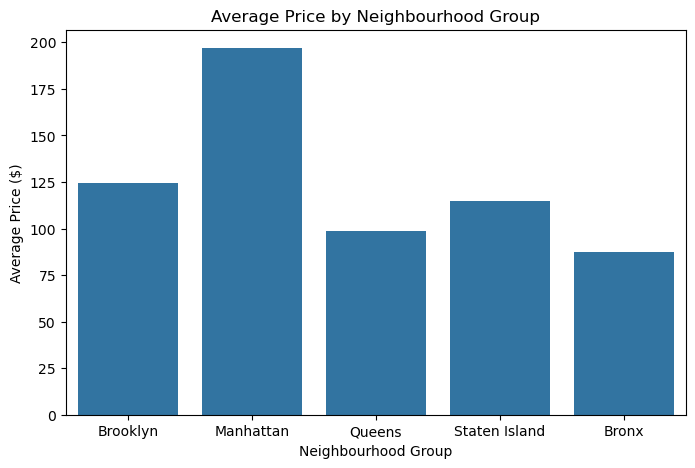

In [226]:
#Average price by neighbourhood group
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group', y='price', data=df, ci=None)
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xlabel('Neighbourhood Group')
plt.show()


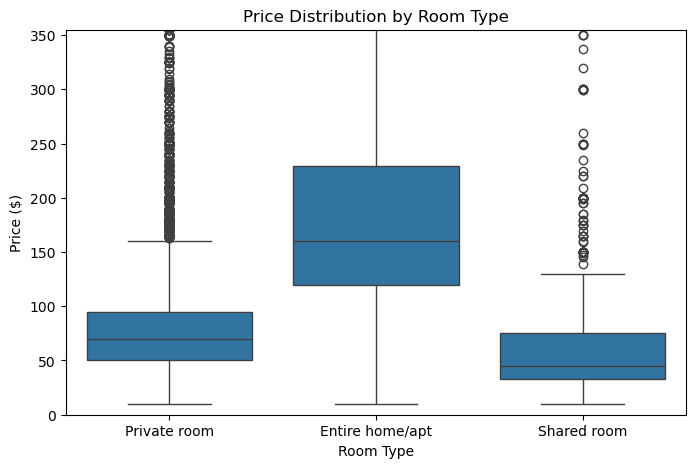

In [231]:
#Price distribution by room type
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.ylabel('Price ($)')
plt.xlabel('Room Type')
plt.ylim(0, df['price'].quantile(0.95))  # avoid extreme outliers
plt.show()

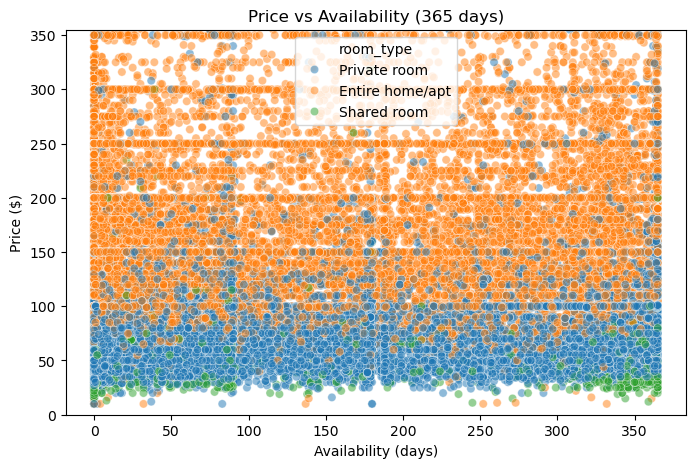

In [233]:
#Relationship between availability and price
plt.figure(figsize=(8,5))
sns.scatterplot(x='availability_365', y='price', hue='room_type', data=df, alpha=0.5)
plt.title('Price vs Availability (365 days)')
plt.ylabel('Price ($)')
plt.xlabel('Availability (days)')
plt.ylim(0, df['price'].quantile(0.95))
plt.show()

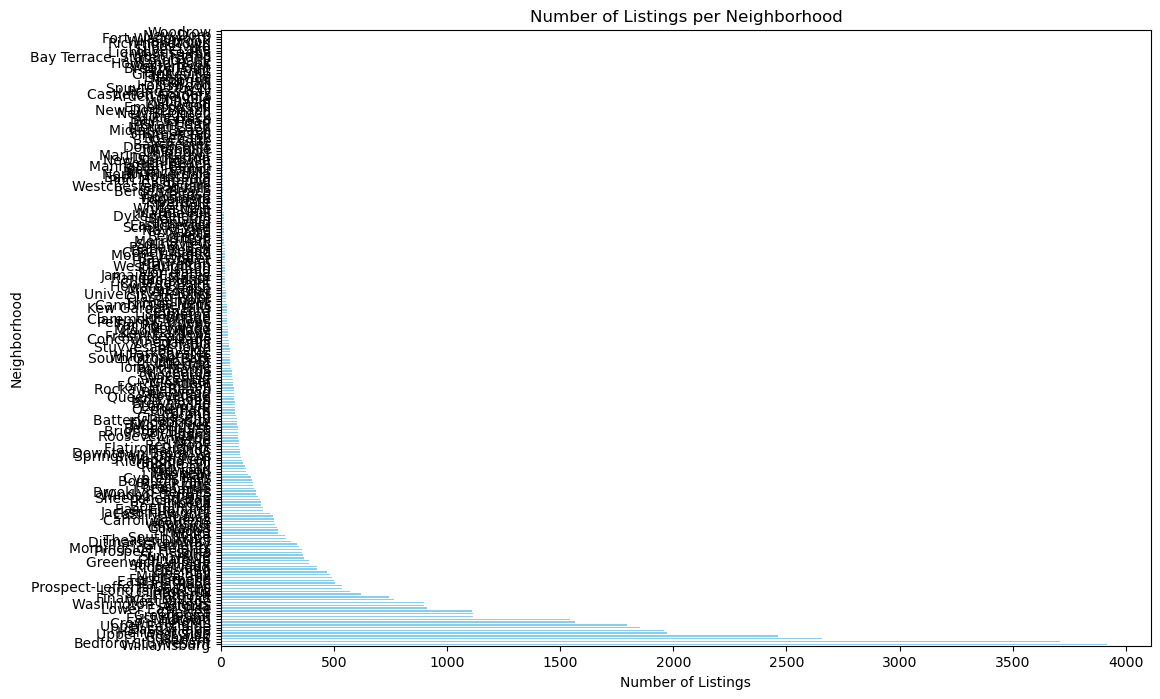

In [240]:
# Neighborhood Saturation
listing_count = df.groupby('neighbourhood')['id'].count().sort_values(ascending=False)

plt.figure(figsize=(12,8))
listing_count.plot(kind='barh', color='skyblue')
plt.title('Number of Listings per Neighborhood')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

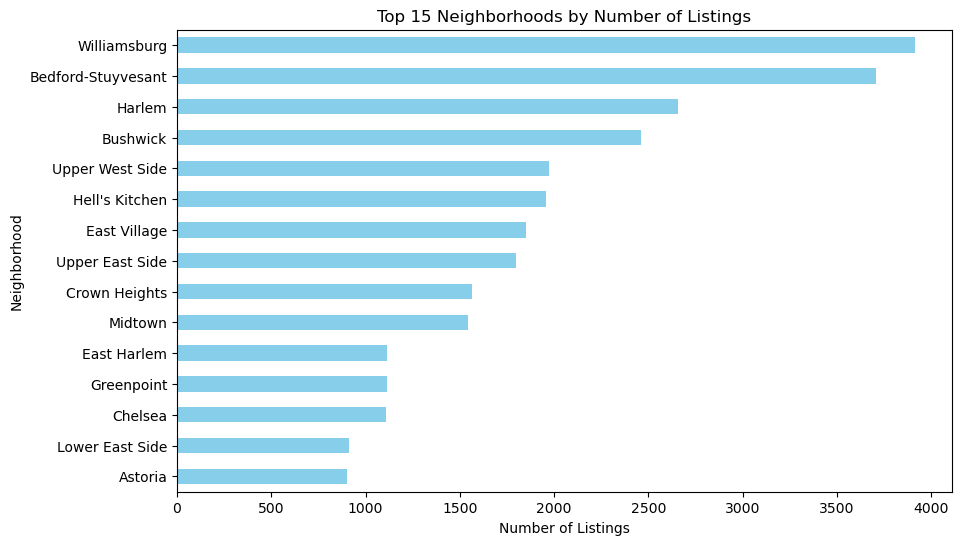

In [242]:
listing_count = df.groupby('neighbourhood')['id'].count().sort_values(ascending=False)

# Show only top 15
top15 = listing_count.head(15)

plt.figure(figsize=(10,6))
top15.plot(kind='barh', color='skyblue')
plt.title('Top 15 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.gca().invert_yaxis()  # highest at the top
plt.show()

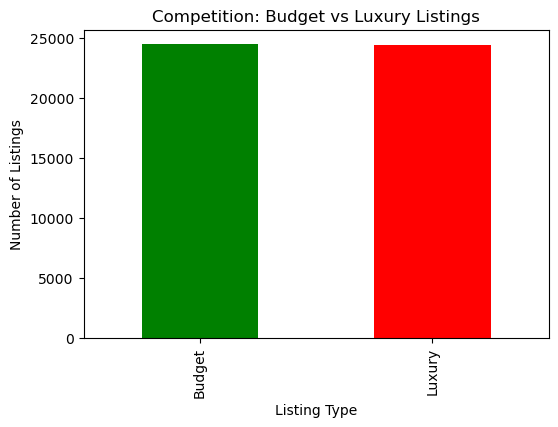

In [248]:
# Convert price to number
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df[df['price'] > 0]

# Create Budget and Luxury groups
median_price = df['price'].median()

df['price_type'] = df['price'].apply(
    lambda x: 'Budget' if x <= median_price else 'Luxury'
)

# Count listings in each group
competition = df['price_type'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
competition.plot(kind='bar', color=['green', 'red'])
plt.title('Competition: Budget vs Luxury Listings')
plt.xlabel('Listing Type')
plt.ylabel('Number of Listings')
plt.show()

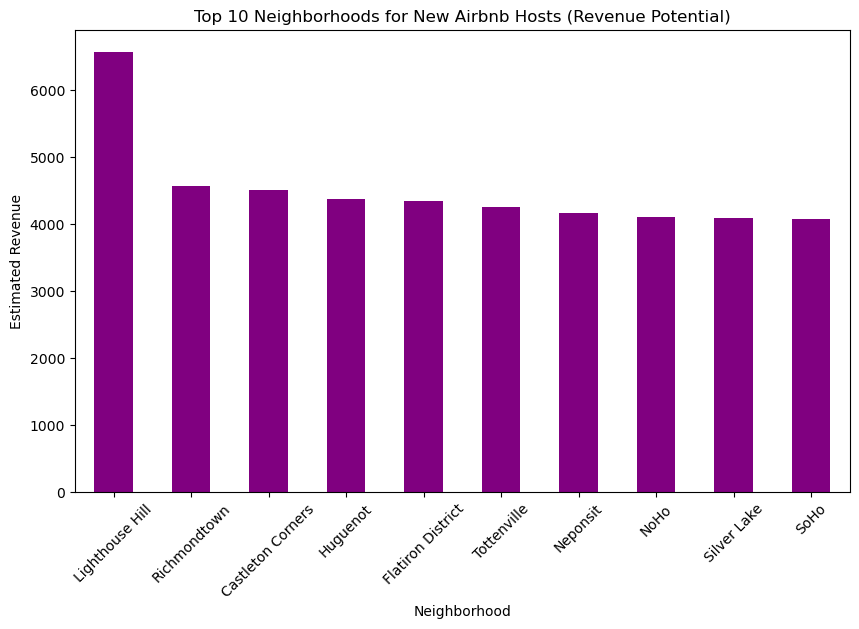

In [250]:
# Make sure price is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')

# Remove missing values
df = df.dropna(subset=['neighbourhood', 'price', 'number_of_reviews'])

# Step 1: Calculate estimated revenue
df['estimated_revenue'] = df['price'] * df['number_of_reviews']

# Step 2: Calculate average revenue per neighborhood
revenue_by_neigh = df.groupby('neighbourhood')['estimated_revenue'].mean()

# Step 3: Get Top 10 best neighborhoods
top10 = revenue_by_neigh.sort_values(ascending=False).head(10)

# Step 4: Plot the result
plt.figure(figsize=(10,6))
top10.plot(kind='bar', color='purple')
plt.title('Top 10 Neighborhoods for New Airbnb Hosts (Revenue Potential)')
plt.xlabel('Neighborhood')
plt.ylabel('Estimated Revenue')
plt.xticks(rotation=45)
plt.show()